Text(0.5, 0.98, '服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布')

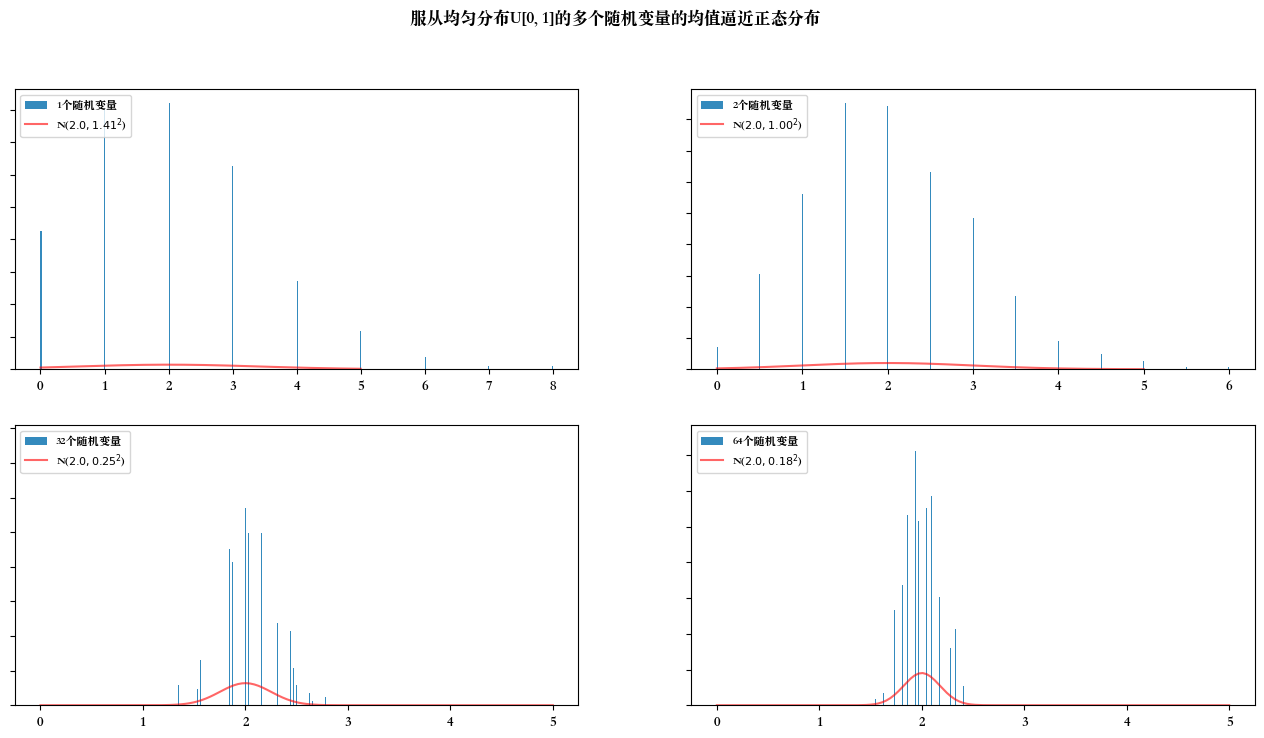

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']

f = plt.figure(figsize=(16, 8)) # type: plt.Figure

# [0, 1] 均匀分布
# a, b = 0, 1
# mean, var = (a + b) / 2, (b - a) ** 2 / 12

norm_mu, norm_var = 2, 2

# 采样个数
sample_nums = 1000

def p_norm(nvr):
    mu = norm_mu
    sigma = np.sqrt(norm_var / nvr)
    norm_x = np.linspace(0, 5, 128)
    # 正态分布
    norm_dis = stats.norm(mu, sigma)
    pdf = norm_dis.pdf(norm_x)
    plt.plot(norm_x, pdf, 'r', alpha=0.6, label=f'N(${mu:.1f}, {sigma:.2f}^2$)')
    
    plt.legend(loc='upper left', prop={'size': 8})


def sample(rv_num):
    # 对随机变量 X1 --- Xn 进行抽样
    # 0-1 均匀分布
    # single_sample_dist = stats.uniform(loc=a, scale=b)
    # 柏松分布
    mean = 2

    x = 0
    for j in range(rv_num):
        # x += single_sample_dist.rvs()
        x += stats.poisson.rvs(mean)
    
    x *= 1 / rv_num
    return x


def plot_hist(rv_num, n):
    """
    
    :param rv_num: 随机变量个数
    :param n: 
    :return: 
    """
    x = np.zeros((sample_nums,))
    sp = f.add_subplot(2, 2, n)
    x = np.array([sample(rv_num) for _ in range(sample_nums)])
    # 画出直方图
    plt.hist(x, 500, density=True, color='#348ABD', label=f'{rv_num}个随机变量')
    plt.setp(sp.get_yticklabels(), visible=False)
    
    # 正态分布曲线
    p_norm(rv_num)

nvr = ([1, 2, 32, 64])
for i in range(np.size(nvr)):
    plot_hist(nvr[i], i + 1)

plt.suptitle("服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布")
    

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

filename = ''
messages = pd.read_csv(filename)
y_obs = messages['numbers'].values

np.seterr(invalid='ignore')

def poisson_log_prob(mu, sign=-1):
    return np.sum(sign * stats.poisson.logpmf(y_obs, mu=mu))

fig = plt.figure(figsize=(12, 5)) # type: plt.Figure
plt.title('Frequency of QQMessages')
plt.xlabel('Number of QQMessages')
plt.ylabel('Frequency')
plt.hist(y_obs, range=(0, 60), bins=60, histtype='stepfilled')

freq_results = opt.minimize_scalar(poisson_log_prob)

freq_results

FileNotFoundError: [Errno 2] No such file or directory: ''

In [1]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_breast_cancer
# 朴素贝利叶
clf = BernoulliNB()

X_train, y_train, X_test, y_test  = [], [], [], []


clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

np.mean(predicted == y_test)
X = load_breast_cancer()
X 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0